<a href="https://colab.research.google.com/github/avinashkolla532/Loan-Approval-Prediction/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
dataset = pd.read_csv('/content/loan_dataset.csv')

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,Male,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,Male,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [ ]:
#label encoding
dataset.replace({"Loan_Status":{'Y':1,'N':0 }},inplace=True)

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,Male,Yes,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,Male,Yes,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,Male,Yes,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,Male,No,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [ ]:
dataset.replace({"Property_Area":{'Urban':0,'Rural':1,'Semiurban':2}},inplace=True)

In [ ]:
dataset["Property_Area"].value_counts()

Property_Area
2    233
0    202
1    179
Name: count, dtype: int64

In [ ]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
dataset_org=dataset.dropna()

In [ ]:
dataset_org.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dataset_org['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [ ]:
dataset_org.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)

<ipython-input-30-4b6c248e4988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_org.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)


In [ ]:
dataset_org.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)

<ipython-input-31-5360ca23247a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_org.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)


In [ ]:
dataset_org.replace({"Married":{'No':0,'Yes':1}},inplace=True)

<ipython-input-32-89f9aa9d3ef5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_org.replace({"Married":{'No':0,'Yes':1}},inplace=True)


In [ ]:
dataset_org.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [ ]:
dataset_org.replace({"Gender":{'Male':0,'Female':1}},inplace=True)

<ipython-input-34-af2f905f511e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_org.replace({"Gender":{'Male':0,'Female':1}},inplace=True)


In [ ]:
dataset_org['Gender'].value_counts()

Gender
0    394
1     86
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

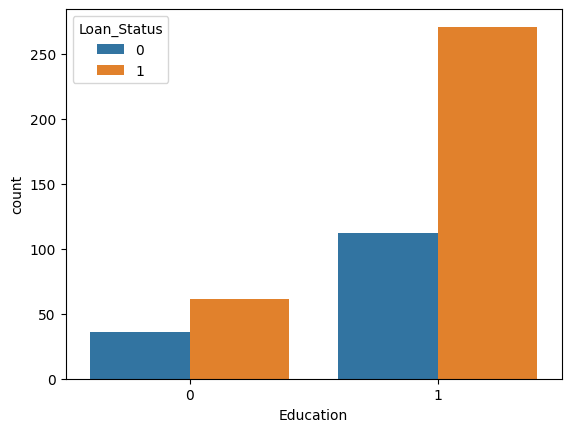

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=dataset_org)

In [ ]:
dataset_org = dataset_org.replace(to_replace='3+',value=4)

In [ ]:
dataset_org.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.085417,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.839398,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
x = dataset_org.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = dataset_org['Loan_Status']

In [ ]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_test.shape,x_train.shape)

(480, 11) (96, 11) (384, 11)


In [ ]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_prediction = model.predict(x_train)

In [ ]:
x_train_accuracy = accuracy_score(x_train_prediction , y_train)

In [ ]:
print(x_train_accuracy)

0.7734375


In [ ]:
x_test_prediction = model.predict(x_test)
x_test_accuracy = accuracy_score(x_test_prediction , y_test)

In [ ]:
print(x_test_accuracy)

0.8125
